In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib as plt

In [ ]:
# nngs_ga__TEXT_nn_test_GA_1__cv_results_df

In [2]:


TUNEDpeak_SA50_curve=pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_SA_grid/nngs_ga__TEXT_nn_test_SA_grid__curves_df.csv")

TUNEDpeak_SA50_run_stats_df=pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_SA_grid/nngs_ga__TEXT_nn_test_SA_grid__run_stats_df.csv")


In [3]:
peak_ga_50_curve = pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_GA_grid/nngs_ga__TEXT_nn_test_GA_grid__curves_df.csv")
peak_ga_50_stat = pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_GA_grid/nngs_ga__TEXT_nn_test_GA_grid__run_stats_df.csv")


peak_SA50_curve=pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_SA_grid/nngs_ga__TEXT_nn_test_SA_grid__curves_df.csv")
peak_SA50_stat=pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_SA_grid/nngs_ga__TEXT_nn_test_SA_grid__run_stats_df.csv")

peak_RHC50_curve=pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_rhc/nngs_rhc__TEXT_nn_test_rhc__curves_df.csv")
peak_RHC50_stat=pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_rhc/nngs_rhc__TEXT_nn_test_rhc__run_stats_df.csv")

# TEXT_nn_test_rhc_1
# peak_SA50_curve=pd.read_csv("./Results/4peak50_sa/sa__4peak50_sa__curves_df.csv")
# peak_SA50_stat=pd.read_csv("./Results/4peak50_sa/sa__4peak50_sa__run_stats_df.csv")
# peak_SA50_curve=pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_rhc_1/nngs_rhc__TEXT_nn_test_rhc_1__curves_df.csv")
# peak_SA50_stat=pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_rhc_1/nngs_rhc__TEXT_nn_test_rhc_1__run_stats_df.csv")


In [4]:
TUNEDpeak_SA50_curve=pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_SA_tuned/nngs_sa__TEXT_nn_test_SA_tuned__curves_df.csv")

TUNEDpeak_SA50_run_stats_df=pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_SA_tuned/nngs_sa__TEXT_nn_test_SA_tuned__run_stats_df.csv")


In [ ]:
TUNEDpeak_SA50_run_stats_df

In [ ]:
# peak_ga_50_curve

In [ ]:
peak_RHC50_curve

In [5]:


def getbestFitRHC(data,df_run_stats_ga):
    
    best_fitness_ga = data['Fitness'].max()
    best_runs_ga = data[data['Fitness'] == best_fitness_ga]
    
    minimum_evaluations = best_runs_ga['FEvals'].min()

    best_curve_run = best_runs_ga[best_runs_ga['FEvals'] == minimum_evaluations]
    best_Iteration = best_curve_run['restarts'].iloc()[0]
#     best_mr = best_curve_run['Mutation Rate'].iloc()[0]
#     best_pop_size = best_curve_run['Population Size'].iloc()[0]
#     print(f'Best Mutation Rate: {best_mr}, best Population Size: {best_pop_size}')
#     run_stats_best_run = data[(data['Mutation Rate'] == best_mr) & (data['Population Size'] == best_pop_size)]
#     run_stats_best_run = df_run_stats_ga[df_run_stats_ga['Iteration'] == best_Iteration]
    run_stats_best_run = df_run_stats_ga[df_run_stats_ga['restarts'] == best_Iteration]

    return({'run_stats_best_run':run_stats_best_run,
            'best_fitness_RHC':best_fitness_ga,
#            'best_mr':best_mr,
            'best_Iteration':best_Iteration})

# HTML(best_runs_ga.to_html())

In [6]:
peak_RHC50_curve.head(1)

,Unnamed: 0,Iteration,Time,Fitness,max_iters,learning_rate,restarts,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts,current_restart,FEvals
0,0,0,0.029442,0.753876,1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,0,2


In [7]:
RHCresults=getbestFitRHC(peak_RHC50_curve,peak_RHC50_stat)
# SAresults=getbestFitSA(peak_SA300)

In [8]:
RHCresults['run_stats_best_run']

,Unnamed: 0,Iteration,Fitness,Time,State,max_iters,learning_rate,restarts,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts,current_restart,FEvals
0,0,0,0.753876,0.029442,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,0,2
1,1,1,0.753876,0.181644,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,0,3
2,2,10,0.753792,0.216665,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,0,13
3,3,50,0.751351,0.366002,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,0,80
4,4,100,0.748656,0.572954,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,0,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,403,50,0.751953,5004.129502,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,50,75132
404,404,100,0.749869,5028.101926,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,50,75202
405,405,250,0.739588,5052.863438,"[-0.7460603339237981, 0.933435676964006, -0.57...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,50,75443
406,406,500,0.727401,5078.386791,"[-0.7460603339237981, 0.933435676964006, -0.67...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,50,75820


In [9]:
RHCresults['run_stats_best_run']['restarts'].nunique()

1

In [10]:
peak_ga_50_curve.head()

,Unnamed: 0,Iteration,Time,Fitness,max_iters,learning_rate,population_sizes,mutation_rates,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts,FEvals
0,0,0,0.399922,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201
1,1,1,0.831782,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,20326
2,2,2,1.216763,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,20326
3,3,3,1.605746,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,20326
4,4,4,1.992875,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,20326


In [36]:
peak_ga_50_curve

,Unnamed: 0,Iteration,Time,Fitness,max_iters,learning_rate,population_sizes,mutation_rates,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts,FEvals
0,0,0,0.399922,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201
1,1,1,0.831782,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,20326
2,2,2,1.216763,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,20326
3,3,3,1.605746,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,20326
4,4,4,1.992875,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,20326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,996,385.411130,0.580105,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
997,997,997,385.798682,0.580105,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
998,998,998,386.187182,0.580105,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
999,999,999,386.578296,0.580105,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254


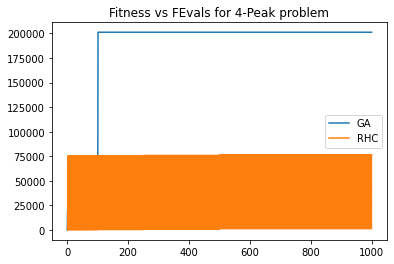

In [50]:
# yMIMIC=MIMICresults['run_stats_best_run']['Fitness']
# xMIMIC=MIMICresults['run_stats_best_run']['FEvals']

# ySA=SAresults['run_stats_best_run']['Fitness']
# xSA=SAresults['run_stats_best_run']['FEvals']

# yRHC=RHCresults['run_stats_best_run']['Fitness']
# xRHC=RHCresults['run_stats_best_run']['FEvals']

# yGA=GAresults['run_stats_best_run']['Fitness']
# xGA=GAresults['run_stats_best_run']['FEvals']


# plot lines 
# plt.plot(xMIMIC, yMIMIC, label = "MIMIC") 
# plt.plot(RHCresults['run_stats_best_run']['FEvals'], RHCresults['run_stats_best_run']['Iteration'], label = "RHC1") 
plt.plot( peak_ga_50_curve['Iteration'],peak_ga_50_curve['FEvals'], label = "GA") 

plt.plot(peak_RHC50_curve['Iteration'], peak_RHC50_curve['FEvals'], label = "RHC") 

# plt.plot(xMIMIC, yMIMIC, label = "MIMIC") 
# plt.plot(xSA, ySA, label = "SA") 
# plt.plot(xRHC, yRHC, label = "RHC") 
# plt.plot(xGA, yGA, label = "GA") 
plt.title("Fitness vs FEvals for 4-Peak problem")
plt.legend() 
plt.show()

In [12]:
# cv_results_df
cv_results_df = pd.read_csv("./Neural networks/Neural networks/TEXT_nn_test_GA_grid/nngs_ga__TEXT_nn_test_GA_grid__cv_results_df.csv")


In [13]:
cv_results_df['mean_test_score']

0     0.528089
1     0.528089
2     0.528089
3     0.528089
4     0.528089
5     0.528089
6     0.528089
7     0.528089
8     0.528089
9     0.528089
10    0.528089
11    0.528089
12    0.528089
13    0.528089
14    0.528089
15    0.528089
16    0.528089
17    0.528089
18    0.528089
19    0.528089
Name: mean_test_score, dtype: float64

In [14]:
cv_results_df.columns

Index(['Unnamed: 0', 'mean_fit_time', 'std_fit_time', 'mean_score_time',
       'std_score_time', 'param_activation', 'param_hidden_layer_sizes',
       'param_learning_rate', 'param_max_iters', 'param_mutation_rates',
       'param_population_sizes', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [15]:
z=RHCresults['run_stats_best_run'][['Iteration','Fitness']].drop_duplicates()

In [16]:
z

,Iteration,Fitness
0,0,0.753876
1,1,0.753876
2,10,0.753792
3,50,0.751351
4,100,0.748656
...,...,...
403,50,0.751953
404,100,0.749869
405,250,0.739588
406,500,0.727401


In [17]:
RHCresults['run_stats_best_run'][RHCresults['run_stats_best_run']['Iteration']==0]

,Unnamed: 0,Iteration,Fitness,Time,State,max_iters,learning_rate,restarts,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts,current_restart,FEvals
0,0,0,0.753876,0.029442,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,0,2
8,8,0,0.753876,4.091850,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,1,1512
16,16,0,0.753876,11.910421,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,2,2989
24,24,0,0.753876,23.802508,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,3,4517
32,32,0,0.753876,39.405466,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,4,6032
40,40,0,0.753876,58.903719,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,5,7537
48,48,0,0.753876,82.128229,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,6,9043
56,56,0,0.753876,109.126871,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,7,10543
64,64,0,0.753876,140.248521,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,8,12033
72,72,0,0.753876,174.962691,"[-0.7460603339237981, 0.933435676964006, -0.47...",1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,9,13539


In [18]:
peak_RHC50_curve

,Unnamed: 0,Iteration,Time,Fitness,max_iters,learning_rate,restarts,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts,current_restart,FEvals
0,0,0,0.029442,0.753876,1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,0,2
1,1,1,0.181644,0.753876,1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,0,3
2,2,2,0.200777,0.753792,1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,0,13
3,3,3,0.203046,0.753792,1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,0,13
4,4,4,0.205095,0.753792,1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50996,50996,996,3.595927,0.707127,1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,50,76571
50997,50997,997,3.597845,0.707127,1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,50,76571
50998,50998,998,3.599777,0.707127,1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,50,76571
50999,50999,999,3.601671,0.707041,1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,50,76571


In [19]:
z=peak_RHC50_curve.groupby(['Iteration'])['Fitness'].mean().reset_index()

In [20]:
w=peak_SA50_curve.groupby(['Iteration'])['Fitness'].mean().reset_index()

In [21]:
peak_SA50_curve[peak_SA50_curve['Fitness']==peak_SA50_curve['Fitness'].min()]

,Unnamed: 0,Iteration,Time,Fitness,max_iters,learning_rate,temperature_list,decay_list,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts,FEvals
855,855,855,482.991728,0.580105,1000,0.1,100000,100000000000,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
856,856,856,483.508944,0.580105,1000,0.1,100000,100000000000,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
857,857,857,484.252366,0.580105,1000,0.1,100000,100000000000,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
858,858,858,484.769379,0.580105,1000,0.1,100000,100000000000,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
859,859,859,485.443086,0.580105,1000,0.1,100000,100000000000,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,996,549.648957,0.580105,1000,0.1,100000,100000000000,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
997,997,997,550.113540,0.580105,1000,0.1,100000,100000000000,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
998,998,998,550.575609,0.580105,1000,0.1,100000,100000000000,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
999,999,999,551.061107,0.580105,1000,0.1,100000,100000000000,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254


In [24]:
import matplotlib.pyplot as plt

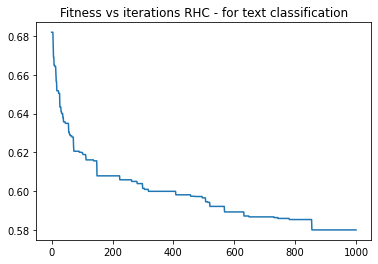

In [25]:
# plt.plot(RHCresults['run_stats_best_run']['Iteration'], RHCresults['run_stats_best_run']['Fitness'], label = "RHC1") 
# plt.plot(peak_ga_50_curve['Iteration'],peak_ga_50_curve['Fitness'], label = "GA") 

plt.plot(peak_SA50_curve['Iteration'],peak_SA50_curve['Fitness']) 
plt.title("Fitness vs iterations RHC - for text classification")
# plt.legend() 
plt.show()

In [40]:
[peak_RHC50_curve['Fitness']==peak_RHC50_curve['Fitness'].min()]

,Unnamed: 0,Iteration,Time,Fitness,max_iters,learning_rate,restarts,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts,current_restart,FEvals
10999,10999,999,3.601671,0.680857,1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,10,16555
11000,11000,1000,3.603640,0.680857,1000,0.01,50,"[-0.7460603339237981, 0.933435676964006, -0.47...",rhc,relu,True,True,5,[2],0.1,500,10,16555


In [42]:
x=peak_RHC50_curve[peak_RHC50_curve['current_restart']==10]

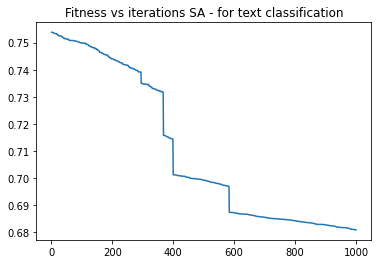

In [59]:

plt.plot(x['Iteration'],x['Fitness']) 
plt.title("Fitness vs iterations SA - for text classification")
# plt.legend() 
plt.show()

In [48]:
TUNEDpeak_SA50_run_stats_df['temperature_list'].unique()

array([1000000])

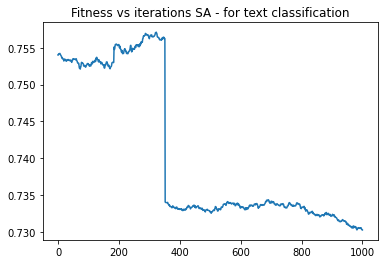

In [61]:

plt.plot(TUNEDpeak_SA50_curve['Iteration'],TUNEDpeak_SA50_curve['Fitness']) 
plt.title("Fitness vs iterations SA - for text classification")
# plt.legend() 
plt.show()

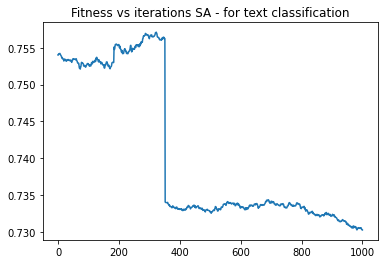

In [26]:

plt.plot(TUNEDpeak_SA50_curve['Iteration'],TUNEDpeak_SA50_curve['Fitness']) 
plt.title("Fitness vs iterations SA - for text classification")
# plt.legend() 
plt.show()

In [27]:
backprop=pd.read_csv("./Neural networks/BackProphistory1000epochs_df.csv")

In [ ]:
backprop

# compare in terms of performance metric and convergence time and behavior. We should think about the advantages of back prop, the advantages that these optimization problems have, note that these are for discrete space and back prop is for continuous and smooth space. What if the space is smooth vs not. 
#Talk about why one outperforms the other. 


In [ ]:
wt

In [ ]:
peak_ga_50_curve['mutation_rates'].unique()

In [ ]:
peak_ga_50_curve[peak_ga_50_curve['Fitness']==peak_ga_50_curve['Fitness'].min()]

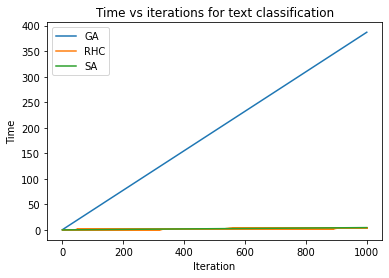

In [35]:

import matplotlib.pyplot as plt 
import numpy as np 
  
# # create data 
# x = [1,2,3,4,5] 
# y = [3,3,3,3,3] 
# yMIMIC=MIMICresults['run_stats_best_run']['Fitness']
# xMIMIC=MIMICresults['run_stats_best_run']['Iteration']

# ySA=SAresults['run_stats_best_run']['Fitness']
# xSA=SAresults['run_stats_best_run']['Iteration']

# yRHC=RHCresults['run_stats_best_run']['Fitness']
# xRHC=RHCresults['run_stats_best_run']['Iteration']

# yGA=GAresults['run_stats_best_run']['Fitness']
# xGA=GAresults['run_stats_best_run']['Iteration']

zt=peak_RHC50_curve.groupby(['Iteration'])['Time'].mean().reset_index()

wt=peak_SA50_curve.groupby(['Iteration'])['Time'].mean().reset_index()
# plot lines 
# plt.plot(xMIMIC, yMIMIC, label = "MIMIC") 
# plt.plot(RHCresults['run_stats_best_run']['Iteration'], RHCresults['run_stats_best_run']['Fitness'], label = "RHC1") 
plt.plot(peak_ga_50_curve['Iteration'],peak_ga_50_curve['Time'], label = "GA") 

plt.plot(peak_RHC50_curve['Iteration'],peak_RHC50_curve['Time'], label = "RHC") 
plt.plot(TUNEDpeak_SA50_curve['Iteration'],TUNEDpeak_SA50_curve['Time'], label = "SA") 
# plt.plot(backprop['Unnamed: 0'],backprop['loss'],label="Back prop")
plt.title("Time vs iterations for text classification")
plt.xlabel("Iteration")
plt.ylabel("Time")
plt.legend()

plt.show()

In [ ]:
peak_RHC50_curve[peak_RHC50_curve['Fitness']==peak_RHC50_curve['Fitness'].min()]

In [29]:
# z=peak_RHC50_curve.groupby(['Iteration'])['Fitness'].mean().reset_index()
z=peak_RHC50_curve[peak_RHC50_curve['current_restart']==10]
w=peak_SA50_curve.groupby(['Iteration'])['Fitness'].mean().reset_index()

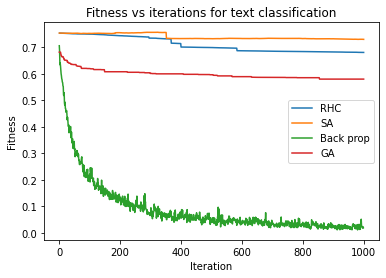

In [33]:

import matplotlib.pyplot as plt 
import numpy as np 
  
# # create data 
# x = [1,2,3,4,5] 
# y = [3,3,3,3,3] 
# yMIMIC=MIMICresults['run_stats_best_run']['Fitness']
# xMIMIC=MIMICresults['run_stats_best_run']['Iteration']

# ySA=SAresults['run_stats_best_run']['Fitness']
# xSA=SAresults['run_stats_best_run']['Iteration']

# yRHC=RHCresults['run_stats_best_run']['Fitness']
# xRHC=RHCresults['run_stats_best_run']['Iteration']

# yGA=GAresults['run_stats_best_run']['Fitness']
# xGA=GAresults['run_stats_best_run']['Iteration']


# plot lines 
# plt.plot(xMIMIC, yMIMIC, label = "MIMIC") 
# plt.plot(RHCresults['run_stats_best_run']['Iteration'], RHCresults['run_stats_best_run']['Fitness'], label = "RHC1") 

plt.plot(z['Iteration'],z['Fitness'], label = "RHC") 
plt.plot(TUNEDpeak_SA50_curve['Iteration'],TUNEDpeak_SA50_curve['Fitness'], label = "SA") 
plt.plot(backprop['Unnamed: 0'],backprop['loss'],label="Back prop")
plt.plot(peak_ga_50_curve['Iteration'],peak_ga_50_curve['Fitness'], label = "GA") 
plt.title("Fitness vs iterations for text classification")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.legend() 
plt.show()

In [58]:
peak_ga_50_curve

,Unnamed: 0,Iteration,Time,Fitness,max_iters,learning_rate,population_sizes,mutation_rates,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts,FEvals
0,0,0,0.399922,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201
1,1,1,0.831782,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,20326
2,2,2,1.216763,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,20326
3,3,3,1.605746,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,20326
4,4,4,1.992875,0.681884,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,20326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,996,385.411130,0.580105,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
997,997,997,385.798682,0.580105,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
998,998,998,386.187182,0.580105,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254
999,999,999,386.578296,0.580105,1000,0.1,200,0,"[-0.7460603339237981, 0.933435676964006, -0.47...",ga,relu,True,True,5,[2],0.1,500,201254


In [57]:
peak_ga_50_curve['Iteration']
# .sum()

0          0
1          1
2          2
3          3
4          4
        ... 
996      996
997      997
998      998
999      999
1000    1000
Name: Iteration, Length: 1001, dtype: int64

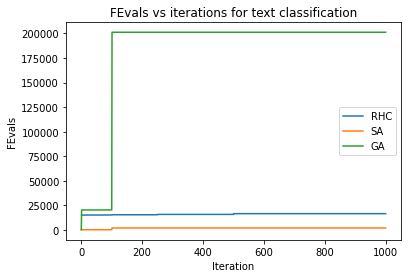

In [52]:
# plt.plot( peak_ga_50_curve['Iteration'],peak_ga_50_curve['FEvals'], label = "GA") 

# plt.plot(peak_RHC50_curve['Iteration'], peak_RHC50_curve['FEvals'], label = "RHC") 

plt.plot(z['Iteration'],z['FEvals'], label = "RHC") 
plt.plot(TUNEDpeak_SA50_curve['Iteration'],TUNEDpeak_SA50_curve['FEvals'], label = "SA") 
# plt.plot(backprop['Unnamed: 0'],backprop['loss'],label="Back prop")
plt.plot(peak_ga_50_curve['Iteration'],peak_ga_50_curve['FEvals'], label = "GA") 
plt.title("FEvals vs iterations for text classification")
plt.xlabel("Iteration")
plt.ylabel("FEvals")
plt.legend() 
plt.show()

In [ ]:
plt.plot(peak_ga_50_curve['Iteration'],peak_ga_50_curve['Fitness'], label = "GA")

In [ ]:
TUNEDpeak_SA50_curve

In [ ]:
TUNEDpeak_SA50_curve

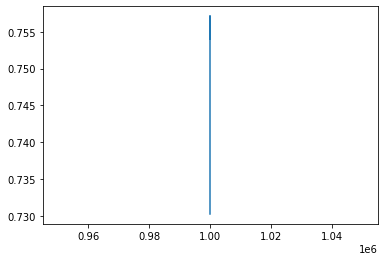

In [32]:
plt.plot(TUNEDpeak_SA50_curve['temperature_list'],TUNEDpeak_SA50_curve['Fitness'], label = "SA") 